In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

In [3]:
# read data

df = pd.read_excel('/Users/Owner/Desktop/train.xlsx')

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# 检查缺失值
missing_values = df.isnull().sum()

# 打印每列的缺失值数量
print(missing_values)


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
# 检查缺失值比例
missing_percentage = df.isnull().mean() * 100

# 打印缺失值数量和比例
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)


                                   Missing Values  Percentage
Unnamed: 0                                      0    0.000000
id                                              0    0.000000
Gender                                          0    0.000000
Customer Type                                   0    0.000000
Age                                             0    0.000000
Type of Travel                                  0    0.000000
Class                                           0    0.000000
Flight Distance                                 0    0.000000
Inflight wifi service                           0    0.000000
Departure/Arrival time convenient               0    0.000000
Ease of Online booking                          0    0.000000
Gate location                                   0    0.000000
Food and drink                                  0    0.000000
Online boarding                                 0    0.000000
Seat comfort                                    0    0.000000
Inflight

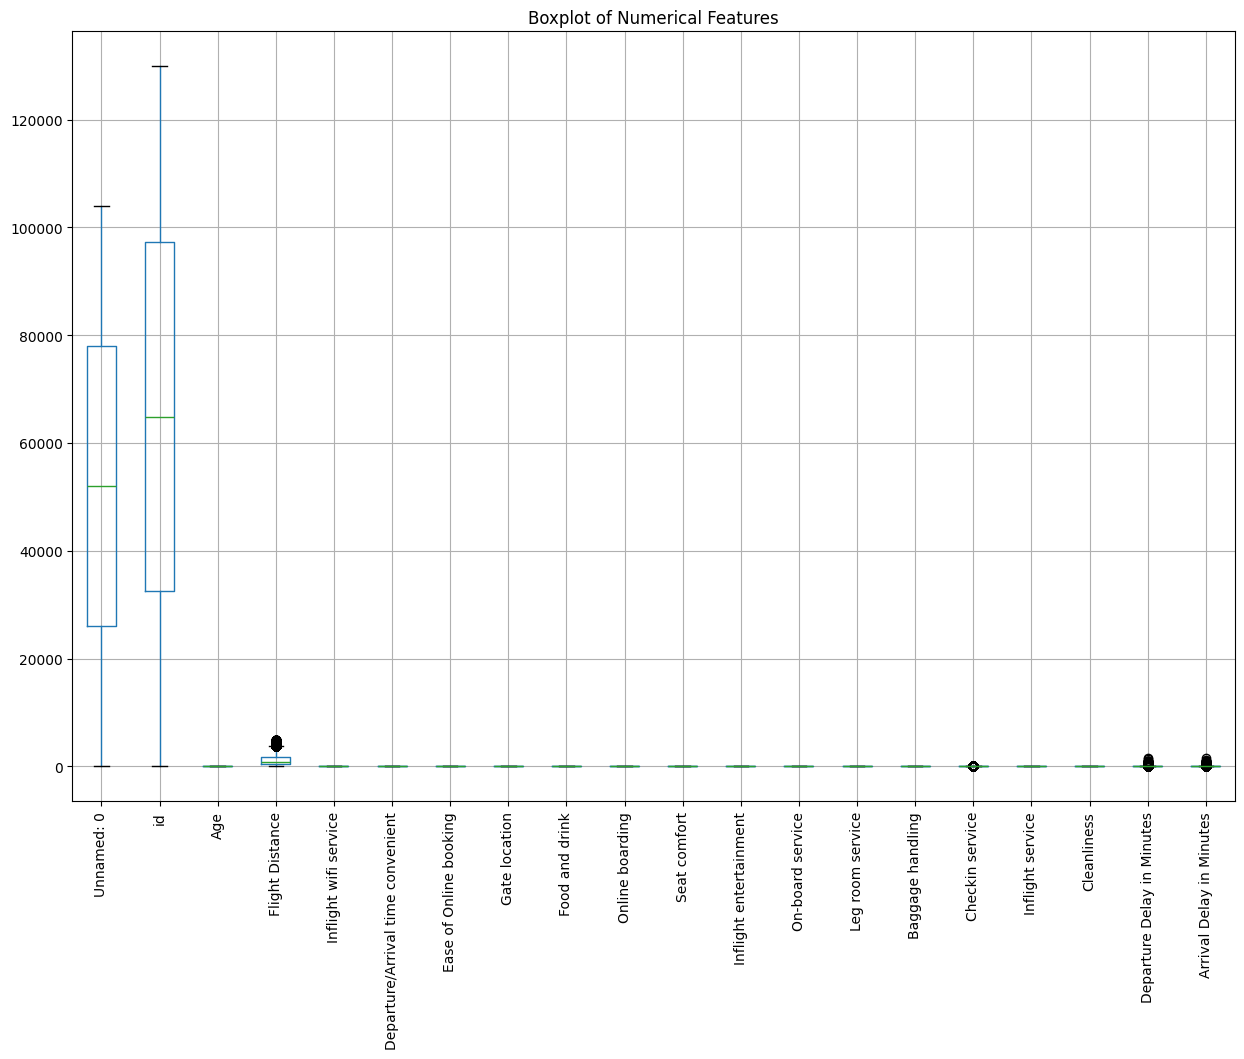

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 只选择数值型列
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 为每个数值型列生成箱线图
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()
